In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append('/Users/aragon/workspace/resnet_detection/keras_retinanet')
import keras
import keras.preprocessing.image
from keras_retinanet.models.resnet import custom_objects
from keras_retinanet.preprocessing.coco import CocoGenerator

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import keras_retinanet.models.mobilenet as mobilenet

import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


## Load RetinaNet model

In [2]:
custom_objects.update({'relu6': mobilenet.relu6,
                       'DepthwiseConv2D': mobilenet.DepthwiseConv2D})

In [34]:
model = keras.models.load_model('snapshots/mobilenet_a0.25_s8_rdc2/mobilenet_a0.25_s8_rdc2_best.h5',custom_objects=custom_objects)
#print(model.summary())

/Users/aragon/anaconda/envs/py35/lib/python3.5/site-packages/keras/models.py:270: UserWarning: Output "non_maximum_suppression_4" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "non_maximum_suppression_4" during training.
  sample_weight_mode=sample_weight_mode)


## Run detection on example

1.9294137954711914


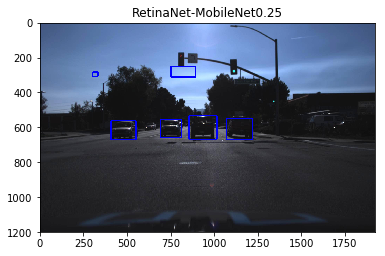

In [35]:
scale = 0.5
img = cv2.imread('samples/1479501956207664677.jpg')
draw = img.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=scale, fy=scale)
t=time.time()
_, _, detections = model.predict_on_batch(np.expand_dims(img, axis=0))
predicted_labels = np.argmax(detections[0, :, 4:], axis=1)
scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]
detections[:, :4] /= scale
for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
    if score < 0.5:
        continue
    b = detections[0, idx, :4].astype(int)
    cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 6)
plt.imshow(draw)
plt.title("RetinaNet-MobileNet0.25")
print(time.time()-t)

In [9]:
detections[0, :, 4:].shape

(300, 80)

In [11]:
detections.shape

(1, 300, 84)

In [12]:
scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]


In [14]:
scores.shape

(300,)

In [11]:
scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]

scale= 0.5555555555555556
scale= 0.5555555555555556
scale= 0.5555555555555556
scale= 0.5555555555555556
scale= 0.5555555555555556
scale= 0.3333333333333333
12.210664987564087


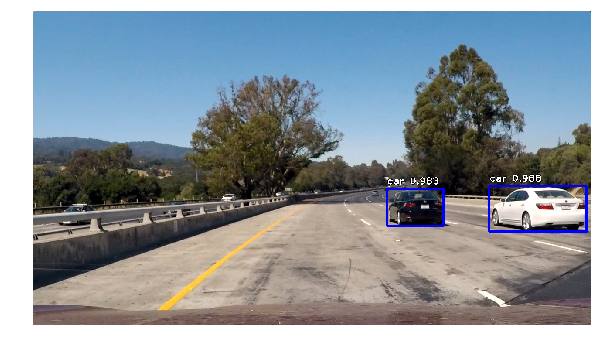

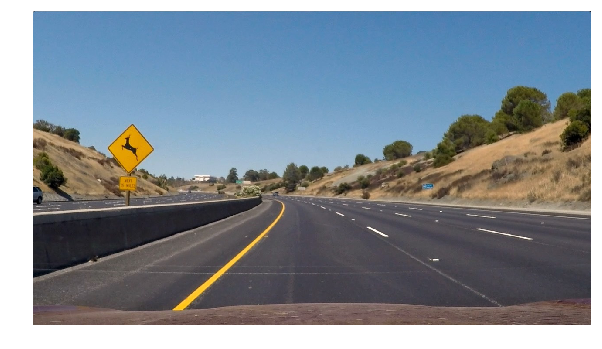

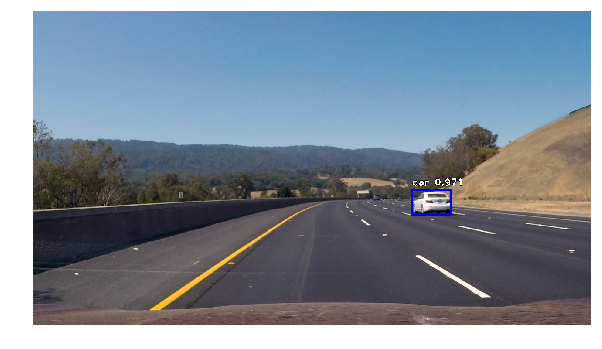

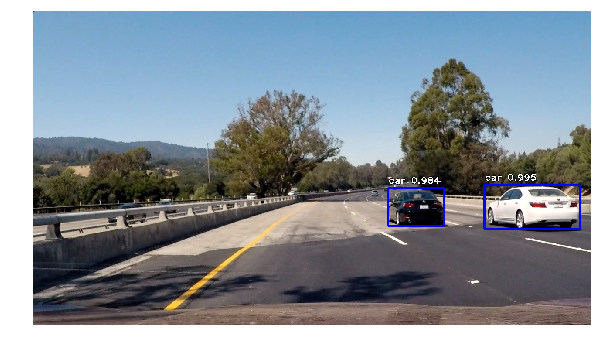

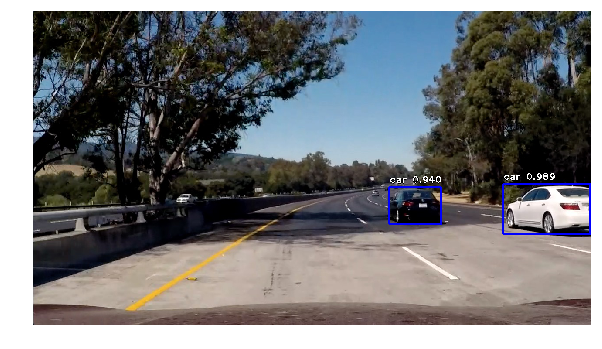

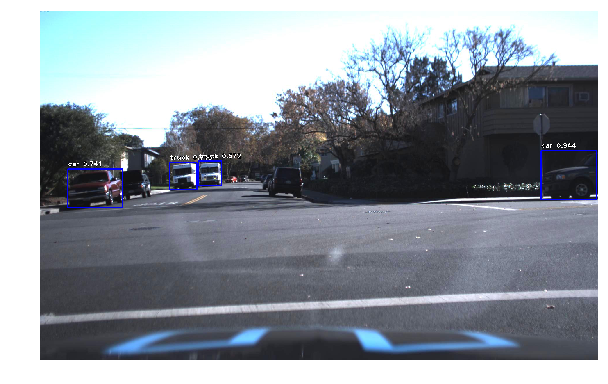

In [10]:
t = time.time()
for i in range(6):
    image = cv2.imread('test{}.jpg'.format(i+1))
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    image = val_generator.preprocess_image(image)
    image, scale = val_generator.resize_image(image)
    print('scale=',scale)
    _, _, detections = model.predict_on_batch(np.expand_dims(image, axis=0))
    predicted_labels = np.argmax(detections[0, :, 4:], axis=1)
    scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]
    detections[:, :4] /= scale
    for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
        if score < 0.5:
            continue
        b = detections[0, idx, :4].astype(int)
        cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 3)
        caption = "{} {:.3f}".format(val_generator.label_to_name(label), score)
        cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 3)
        cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 2)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(draw)
print(time.time()-t)

processing time:  4.125444173812866


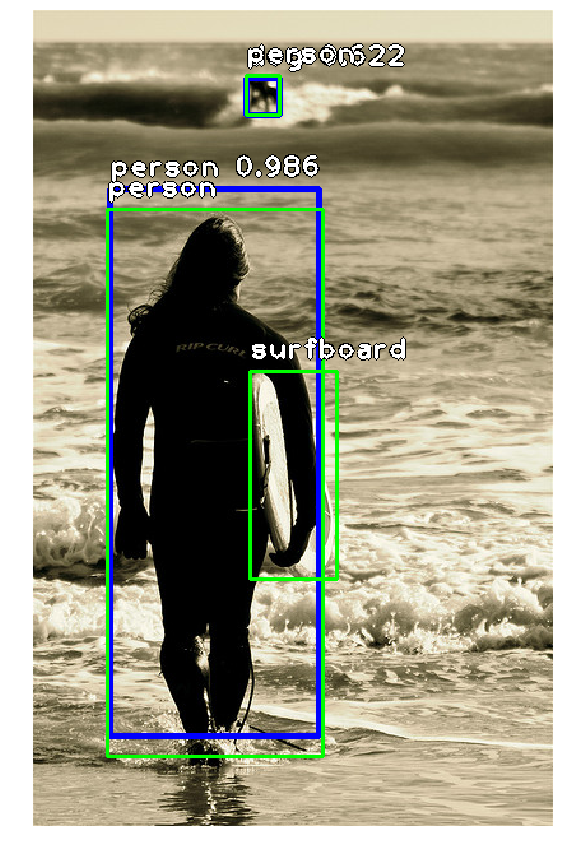

In [4]:
# load image
index = 51
image = val_generator.load_image(index)

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = val_generator.preprocess_image(image)
image, scale = val_generator.resize_image(image)
annotations = val_generator.load_annotations(index)
index += 1

# process image
start = time.time()
_, _, detections = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# compute predicted labels and scores
predicted_labels = np.argmax(detections[0, :, 4:], axis=1)
scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]

# correct for image scale
detections[:, :4] /= scale

# visualize detections
for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
    if score < 0.5:
        continue
    b = detections[0, idx, :4].astype(int)
    cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 3)
    caption = "{} {:.3f}".format(val_generator.label_to_name(label), score)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 3)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 2)
    
# visualize annotations
for annotation in annotations:
    label = int(annotation[4])
    b = annotation[:4].astype(int)
    cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), (0, 255, 0), 2)
    caption = "{}".format(val_generator.label_to_name(label))
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 3)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 2)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()